In [8]:
import pandas as pd

df = pd.read_csv('Data/Merged SPI & NDVI/Cape_York_Peninsula_merged_spi_ndvi.csv')

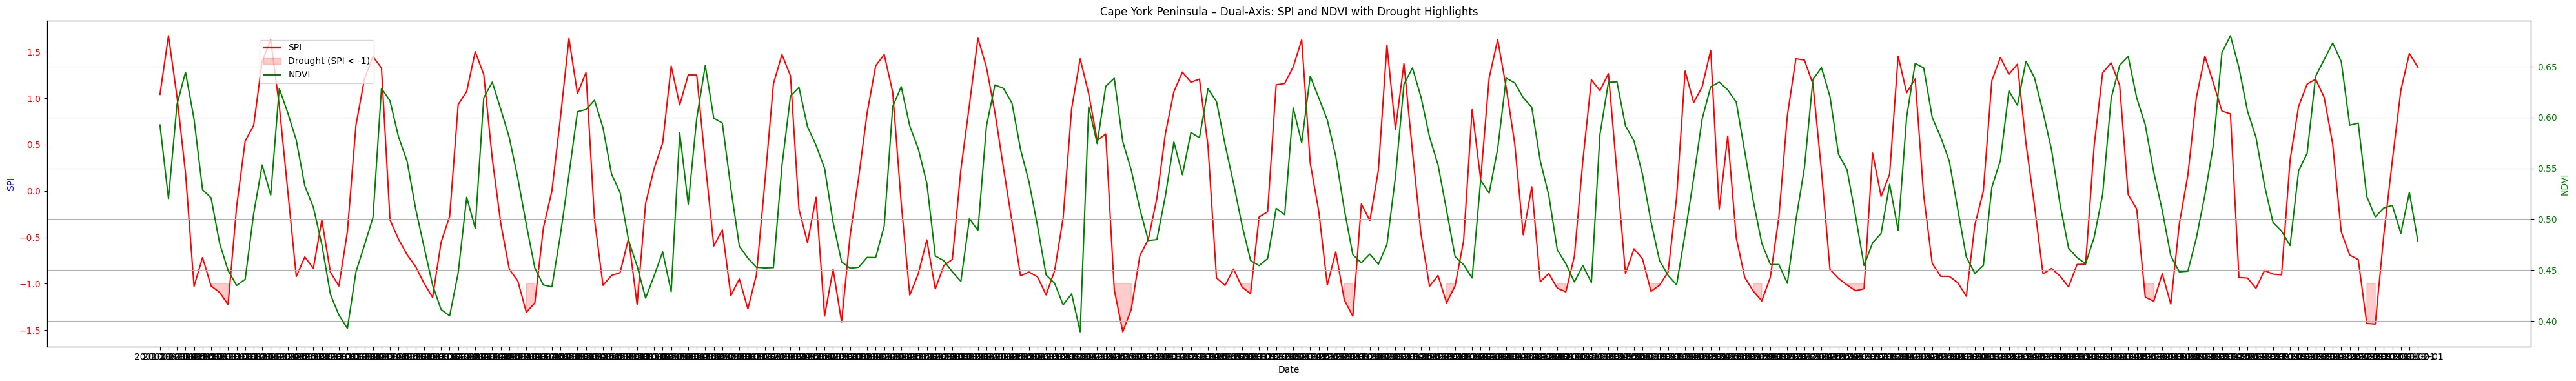

In [ ]:
import matplotlib.pyplot as plt

def plot_dual_axis_highlight(df, region_name):
    fig, ax1 = plt.subplots(figsize=(40, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('SPI', color='blue')
    ax1.plot(df['Date'], df['SPI'], color='red', label='SPI')
    ax1.tick_params(axis='y', labelcolor='red')

    # Highlight drought periods
    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1, where=drought_periods, color='red', alpha=0.2, label='Drought (SPI < -1)')

    # Create second axis for NDVI
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green')
    ax2.plot(df['Date'], df['NDVI'], color='green', label='NDVI')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f'{region_name} – Dual-Axis: SPI and NDVI with Drought Highlights')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.grid(True)
    plt.show()

plot_dual_axis_highlight(df, 'Cape York Peninsula')


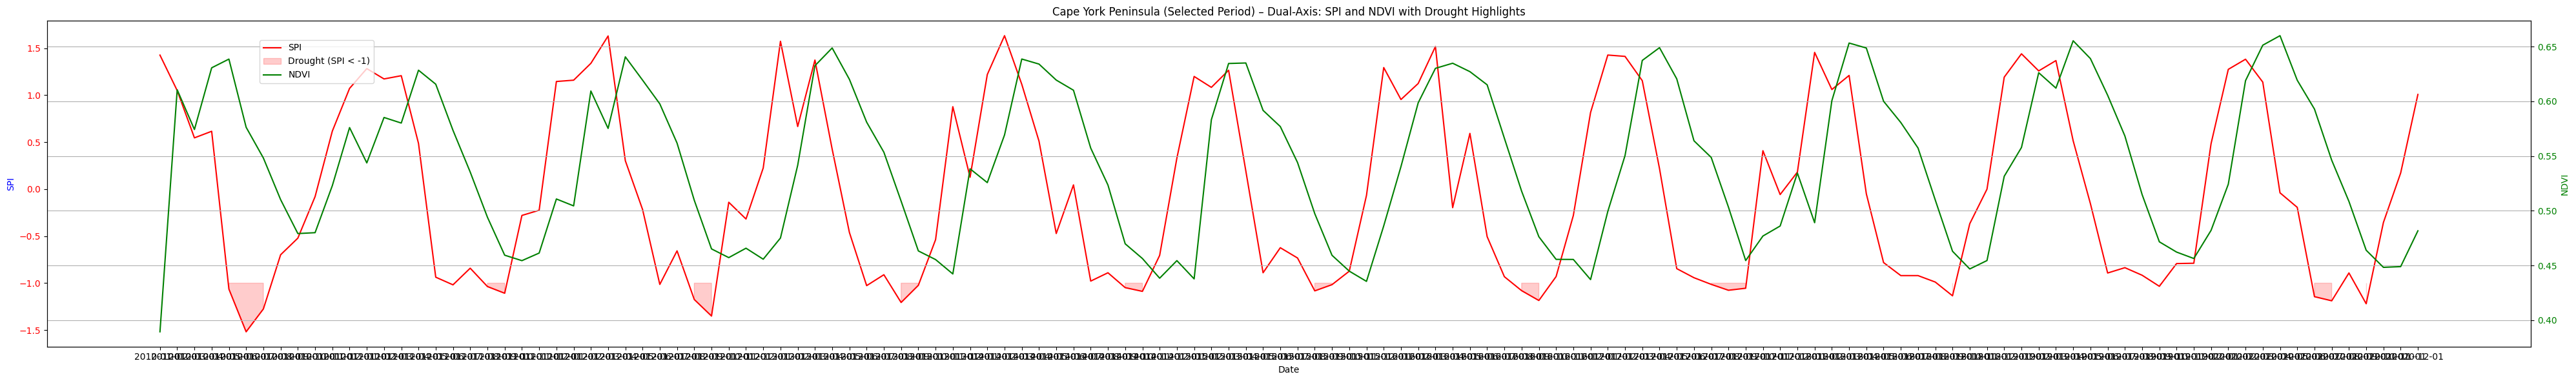

In [23]:
# Filter the dataframe for the selected period
start_date = '2010-01-01'
end_date = '2020-12-31'

selected_period_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Plot the selected period
plot_dual_axis_highlight(selected_period_df, 'Cape York Peninsula (Selected Period)')

In [17]:
import pandas as pd
df = pd.read_csv('Data\Merged SPI & NDVI\Desert_Uplands_merged_spi_ndvi.csv')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_29140\2739698231.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('Data\Merged SPI & NDVI\Desert_Uplands_merged_spi_ndvi.csv')


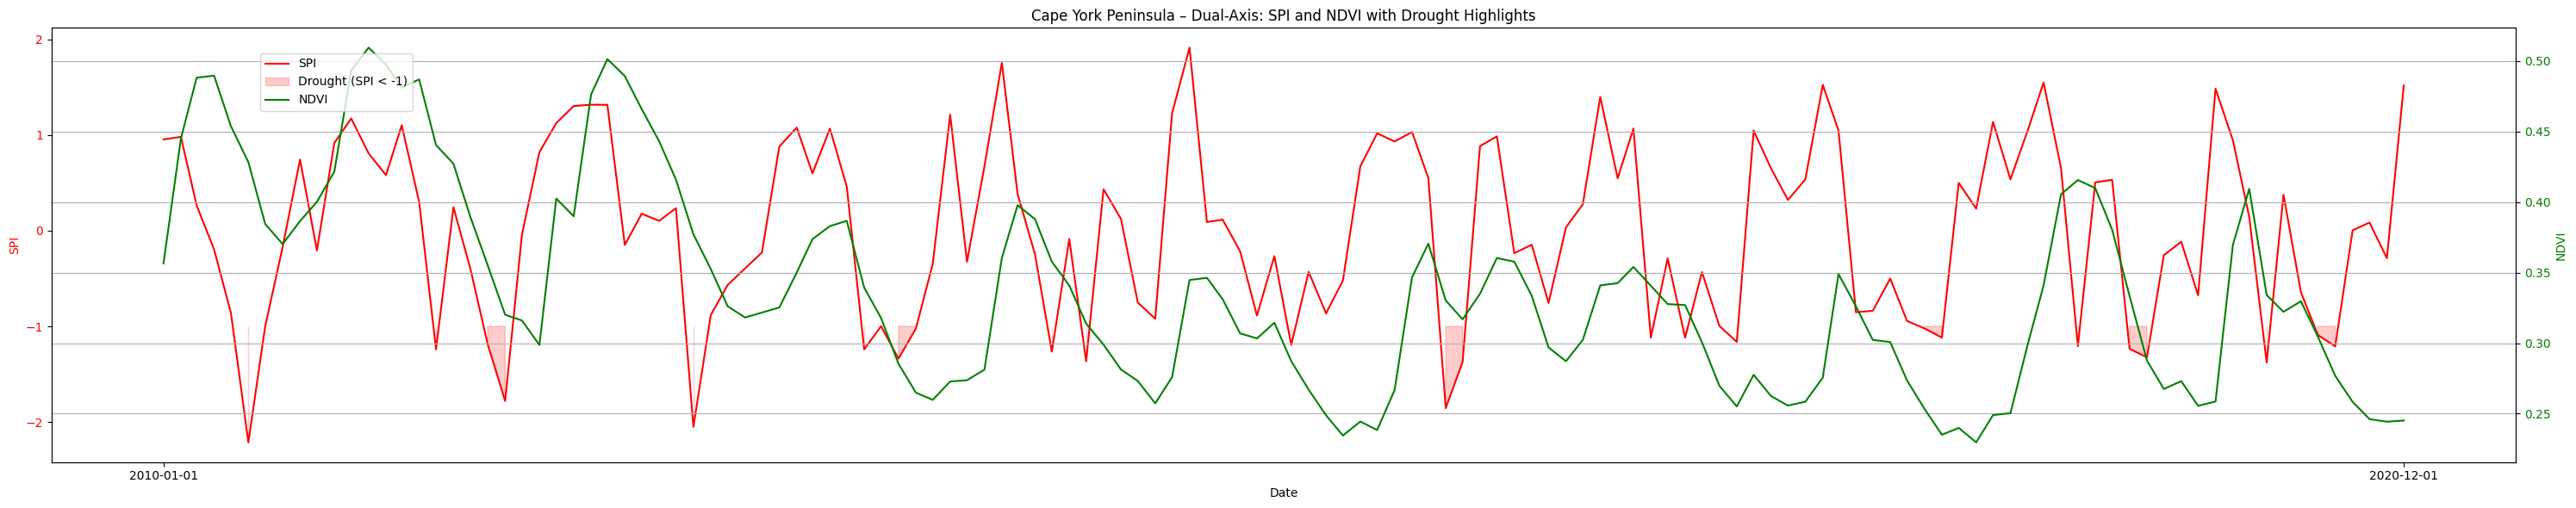

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dual_axis_highlight(df, region_name, start_date=None, end_date=None):
    # Convert to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date range if specified
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        df = df[mask]

    fig, ax1 = plt.subplots(figsize=(30, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('SPI', color='red')
    ax1.plot(df['Date'], df['SPI'], color='red', label='SPI')
    ax1.tick_params(axis='y', labelcolor='red')

    # Highlight drought periods
    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1, where=drought_periods, color='red', alpha=0.2, label='Drought (SPI < -1)')

    # Create second axis for NDVI
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green')
    ax2.plot(df['Date'], df['NDVI'], color='green', label='NDVI')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set x-axis ticks only at start and end dates
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([df['Date'].iloc[0].strftime('%Y-%m-%d'), df['Date'].iloc[-1].strftime('%Y-%m-%d')])

    plt.title(f'{region_name} – Dual-Axis: SPI and NDVI with Drought Highlights')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.grid(True)
    plt.show()

plot_dual_axis_highlight(df, 'Cape York Peninsula', start_date='2010-01-01', end_date='2020-12-31')


/var/folders/sj/0lwb59cd0px29vvpktccpgrm0000gn/T/ipykernel_39274/686488378.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
/var/folders/sj/0lwb59cd0px29vvpktccpgrm0000gn/T/ipykernel_39274/686488378.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()


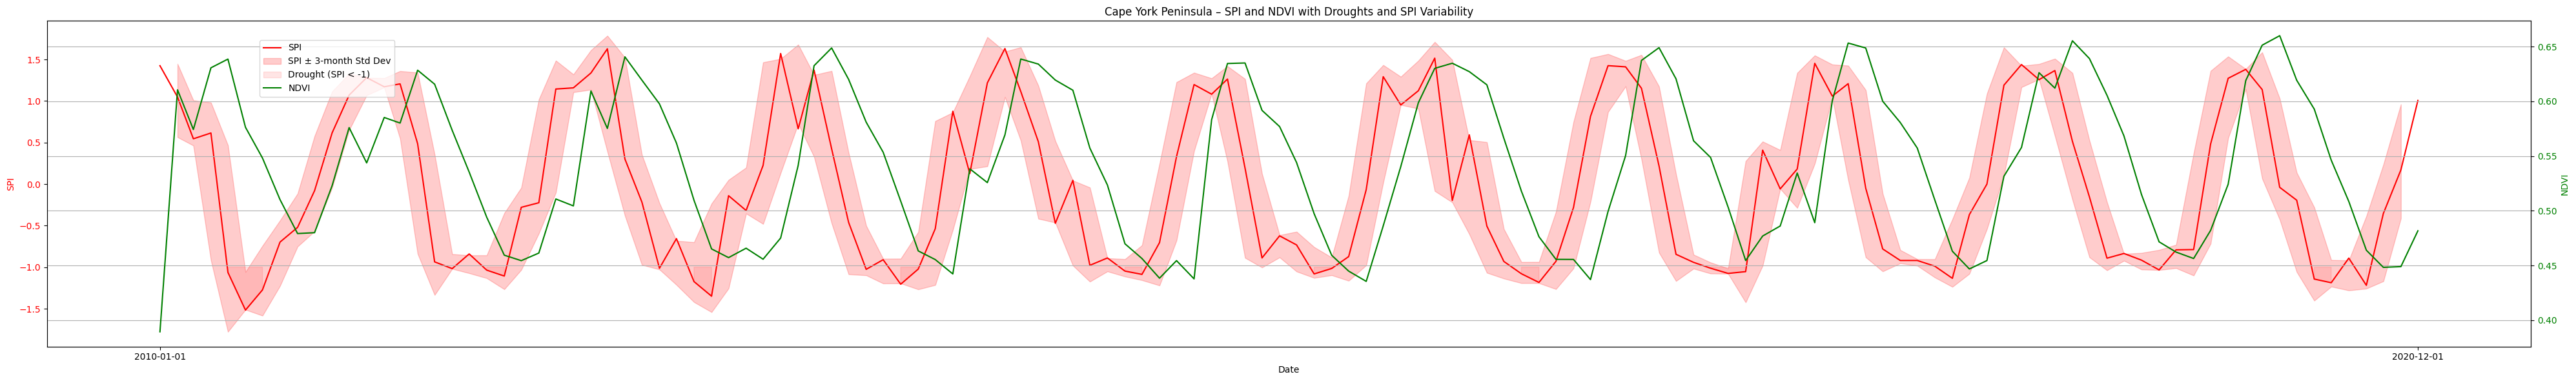

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dual_axis_highlight(df, region_name, start_date=None, end_date=None, rolling_window=3):
    # Convert to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date range
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        df = df[mask]

    # Compute rolling mean and std for SPI
    df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
    df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()

    fig, ax1 = plt.subplots(figsize=(40, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('SPI', color='red')

    # Main SPI line
    ax1.plot(df['Date'], df['SPI'], color='red', label='SPI')

    # Shaded confidence band (SPI ± std)
    ax1.fill_between(df['Date'],
                     df['SPI_Mean'] - df['SPI_Std'],
                     df['SPI_Mean'] + df['SPI_Std'],
                     color='red',
                     alpha=0.2,
                     label=f'SPI ± {rolling_window}-month Std Dev')

    # Highlight droughts
    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1, where=drought_periods, color='red', alpha=0.1, label='Drought (SPI < -1)')

    ax1.tick_params(axis='y', labelcolor='red')

    # NDVI Line
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green')
    ax2.plot(df['Date'], df['NDVI'], color='green', label='NDVI')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set x-axis ticks at start and end only
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([df['Date'].iloc[0].strftime('%Y-%m-%d'), df['Date'].iloc[-1].strftime('%Y-%m-%d')])

    plt.title(f'{region_name} – SPI and NDVI with Droughts and SPI Variability')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.grid(True)
    plt.show()

plot_dual_axis_highlight(df, 'Cape York Peninsula', start_date='2010-01-01', end_date='2020-12-31', rolling_window=3)


C:\Users\Jspch\AppData\Local\Temp\ipykernel_27980\820018648.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
C:\Users\Jspch\AppData\Local\Temp\ipykernel_27980\820018648.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()
C:\Users\Jspch\AppData\Local\Temp\ipykernel_27980\820018648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of

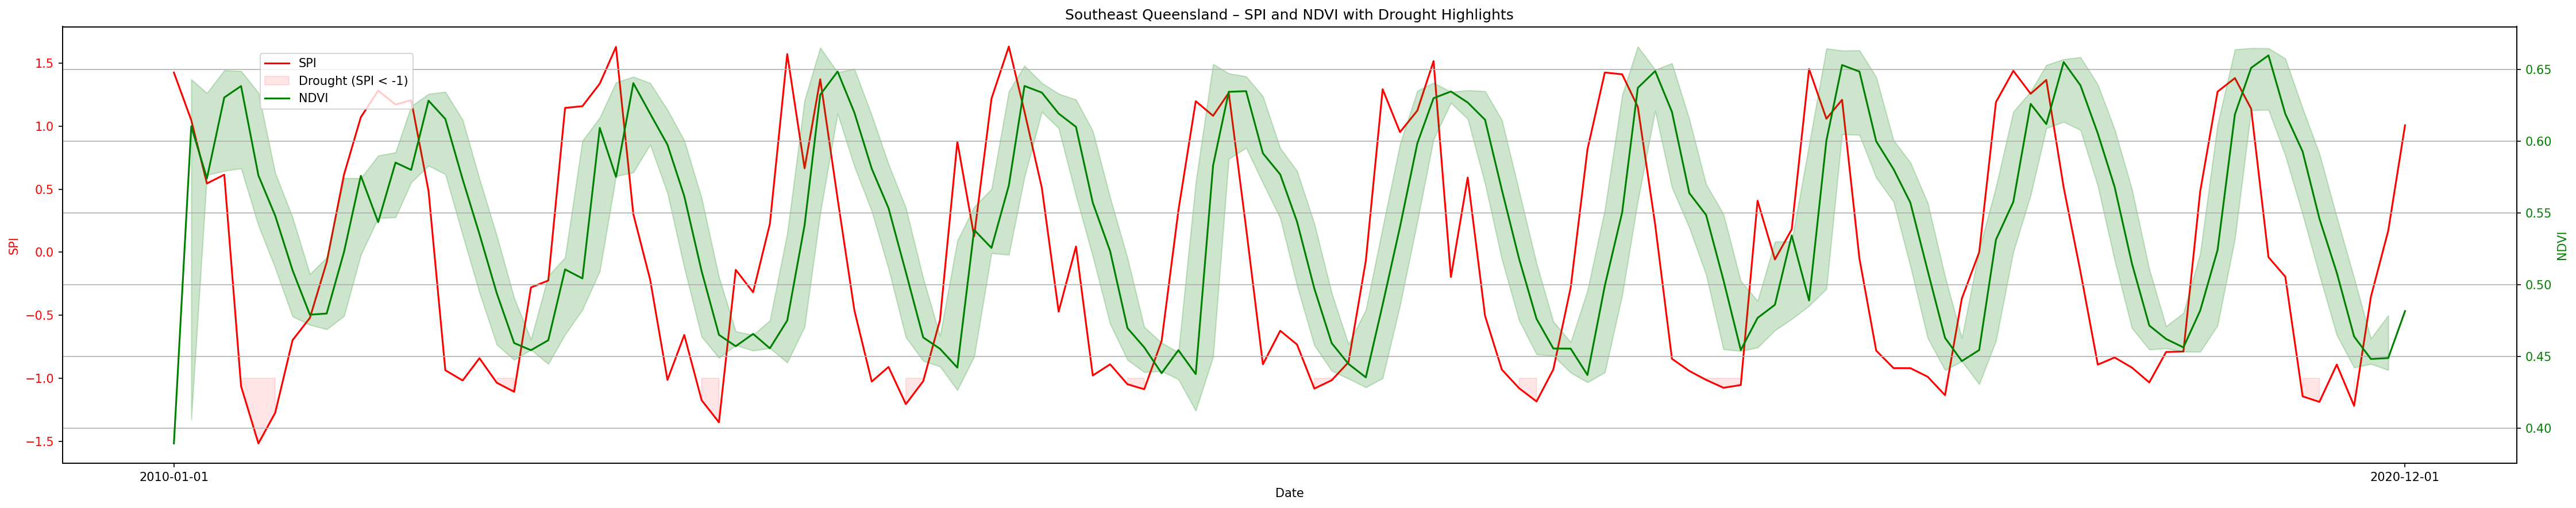

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dual_axis_highlight(df, region_name, start_date=None, end_date=None, rolling_window=3):
    # Ensure datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        df = df[mask]

    # Rolling statistics for SPI
    df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
    df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()

    # Rolling statistics for NDVI
    df['NDVI_Mean'] = df['NDVI'].rolling(window=rolling_window, center=True).mean()
    df['NDVI_Std'] = df['NDVI'].rolling(window=rolling_window, center=True).std()

    fig, ax1 = plt.subplots(figsize=(30, 6), dpi=150)

    # SPI axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SPI', color='red')
    ax1.plot(df['Date'], df['SPI'], color='red', label='SPI')

    # # SPI shaded band
    # ax1.fill_between(df['Date'],
    #                  df['SPI_Mean'] - df['SPI_Std'],
    #                  df['SPI_Mean'] + df['SPI_Std'],
    #                  color='red', alpha=0.2,
    #                  label=f'SPI ±{rolling_window}-month Std Dev')

    # Drought highlight
    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1, where=drought_periods, color='red', alpha=0.1, label='Drought (SPI < -1)')
    ax1.tick_params(axis='y', labelcolor='red')

    # NDVI axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green')
    ax2.plot(df['Date'], df['NDVI'], color='green', label='NDVI')

    # NDVI shaded band
    ax2.fill_between(df['Date'],
                     df['NDVI_Mean'] - df['NDVI_Std'],
                     df['NDVI_Mean'] + df['NDVI_Std'],
                     color='green', alpha=0.2)

    ax2.tick_params(axis='y', labelcolor='green')

    # Custom x-axis ticks (start & end only)
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([df['Date'].iloc[0].strftime('%Y-%m-%d'), df['Date'].iloc[-1].strftime('%Y-%m-%d')])

    # Title & legend
    plt.title(f'{region_name} – SPI and NDVI with Drought Highlights')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.grid(True)
    plt.show()

plot_dual_axis_highlight(df, 'Southeast Queensland', start_date='2010-01-01', end_date='2020-12-31', rolling_window=3)

C:\Users\Jspch\AppData\Local\Temp\ipykernel_27980\1028183289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
C:\Users\Jspch\AppData\Local\Temp\ipykernel_27980\1028183289.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()
C:\Users\Jspch\AppData\Local\Temp\ipykernel_27980\1028183289.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy

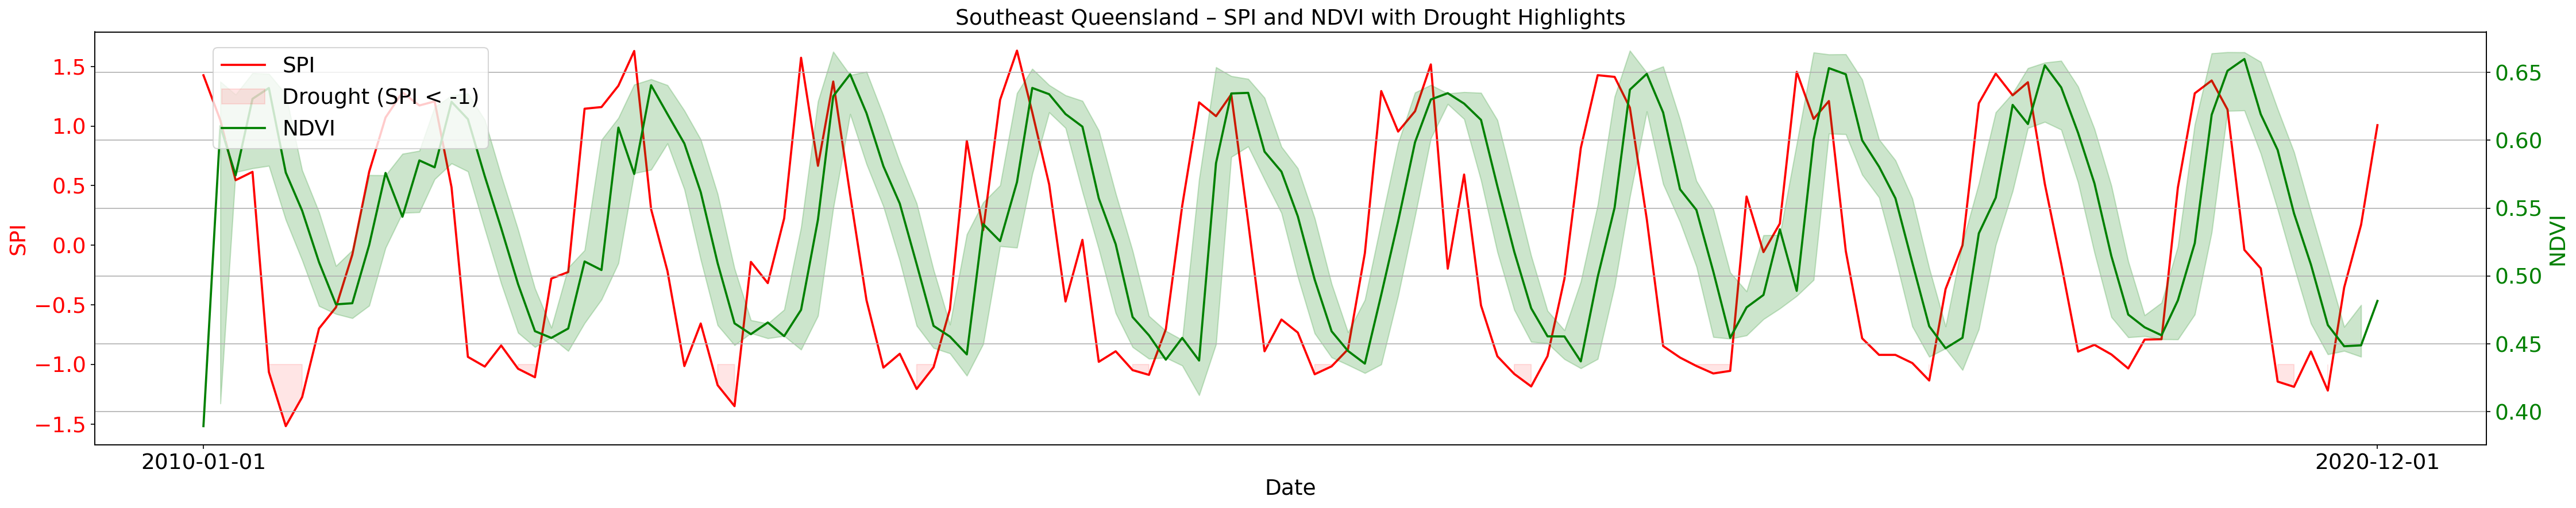

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dual_axis_highlight(df, region_name, start_date=None, end_date=None, rolling_window=3):
    # Ensure datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        df = df[mask]

    # Rolling statistics for SPI
    df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
    df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()

    # Rolling statistics for NDVI
    df['NDVI_Mean'] = df['NDVI'].rolling(window=rolling_window, center=True).mean()
    df['NDVI_Std'] = df['NDVI'].rolling(window=rolling_window, center=True).std()

    fig, ax1 = plt.subplots(figsize=(30, 6), dpi=150)

    # === SPI axis ===
    ax1.set_xlabel('Date', fontsize=18)
    ax1.set_ylabel('SPI', color='red', fontsize=18)
    ax1.plot(df['Date'], df['SPI'], color='red', label='SPI', linewidth=1.8)
    ax1.tick_params(axis='y', labelcolor='red', labelsize=18)
    ax1.tick_params(axis='x', labelsize=18)

    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1,
                     where=drought_periods, color='red', alpha=0.1,
                     label='Drought (SPI < -1)')

    # === NDVI axis ===
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green', fontsize=18)
    ax2.plot(df['Date'], df['NDVI'], color='green', label='NDVI', linewidth=1.8)
    ax2.tick_params(axis='y', labelcolor='green', labelsize=18)

    ax2.fill_between(df['Date'],
                     df['NDVI_Mean'] - df['NDVI_Std'],
                     df['NDVI_Mean'] + df['NDVI_Std'],
                     color='green', alpha=0.2)

    # === Custom X-axis ticks (start & end only) ===
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([df['Date'].iloc[0].strftime('%Y-%m-%d'),
                         df['Date'].iloc[-1].strftime('%Y-%m-%d')],
                        fontsize=18)

    # === Title and Legend ===
    plt.title(f'{region_name} – SPI and NDVI with Drought Highlights', fontsize=18)
    fig.legend(loc='upper left', bbox_to_anchor=(0.08, 0.92), fontsize=18)

    plt.grid(True)
    fig.tight_layout()
    plt.show()

# Run
plot_dual_axis_highlight(df, 'Southeast Queensland',
                         start_date='2010-01-01',
                         end_date='2020-12-31',
                         rolling_window=3)


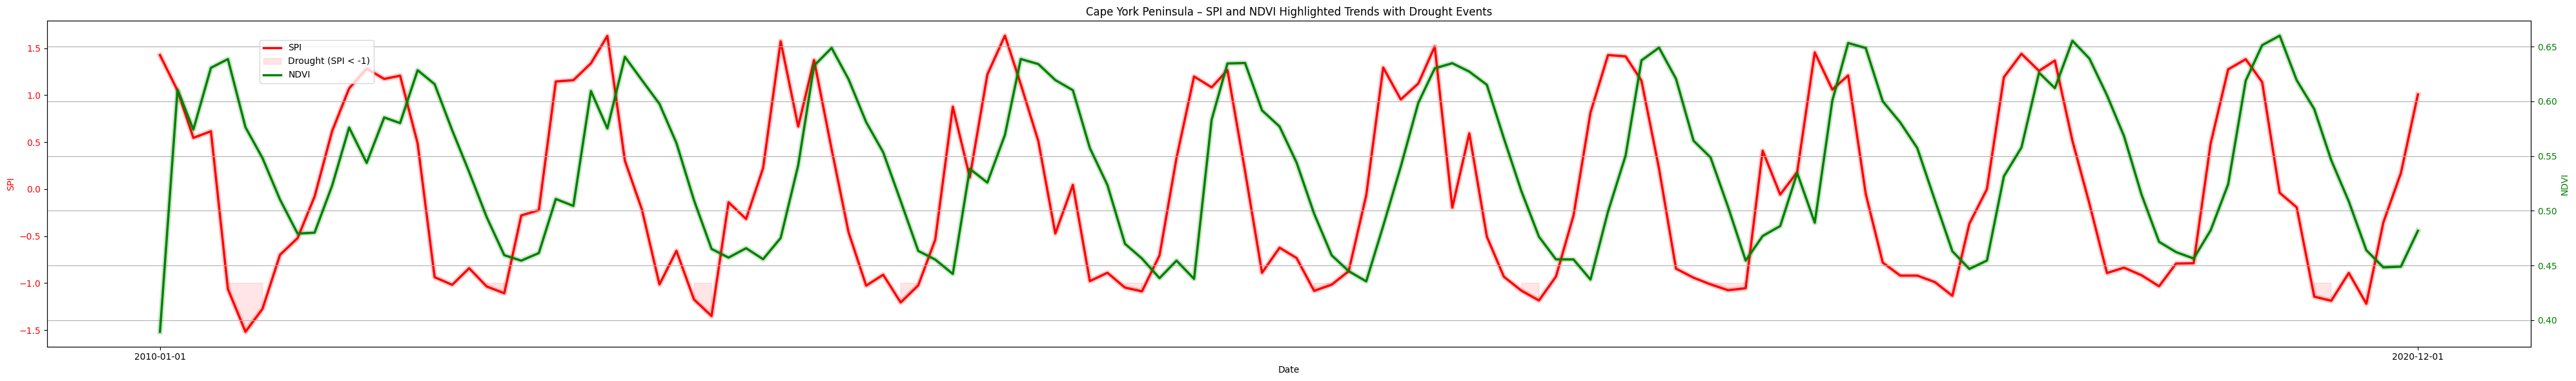

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dual_axis_highlight(df, region_name, start_date=None, end_date=None, line_width=2.5, glow_width=6):
    # Ensure datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date range
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    fig, ax1 = plt.subplots(figsize=(40, 6))

    # SPI axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SPI', color='red')

    # Background glow for SPI
    ax1.plot(df['Date'], df['SPI'], color='red', linewidth=glow_width, alpha=0.2)
    # Main SPI line
    ax1.plot(df['Date'], df['SPI'], color='red', linewidth=line_width, label='SPI')

    # Drought highlight
    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1, where=drought_periods, color='red', alpha=0.1, label='Drought (SPI < -1)')

    ax1.tick_params(axis='y', labelcolor='red')

    # NDVI axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green')

    # Background glow for NDVI
    ax2.plot(df['Date'], df['NDVI'], color='green', linewidth=glow_width, alpha=0.2)
    # Main NDVI line
    ax2.plot(df['Date'], df['NDVI'], color='green', linewidth=line_width, label='NDVI')

    ax2.tick_params(axis='y', labelcolor='green')

    # Set x-axis ticks to just start and end
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([df['Date'].iloc[0].strftime('%Y-%m-%d'), df['Date'].iloc[-1].strftime('%Y-%m-%d')])

    # Title and layout
    plt.title(f'{region_name} – SPI and NDVI Highlighted Trends with Drought Events')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.grid(True)
    plt.show()

plot_dual_axis_highlight(df, 'Cape York Peninsula', start_date='2010-01-01', end_date='2020-12-31', line_width=2.5, glow_width=6)


C:\Users\Jspch\AppData\Local\Temp\ipykernel_29144\1288190272.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
C:\Users\Jspch\AppData\Local\Temp\ipykernel_29144\1288190272.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()
C:\Users\Jspch\AppData\Local\Temp\ipykernel_29144\1288190272.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy

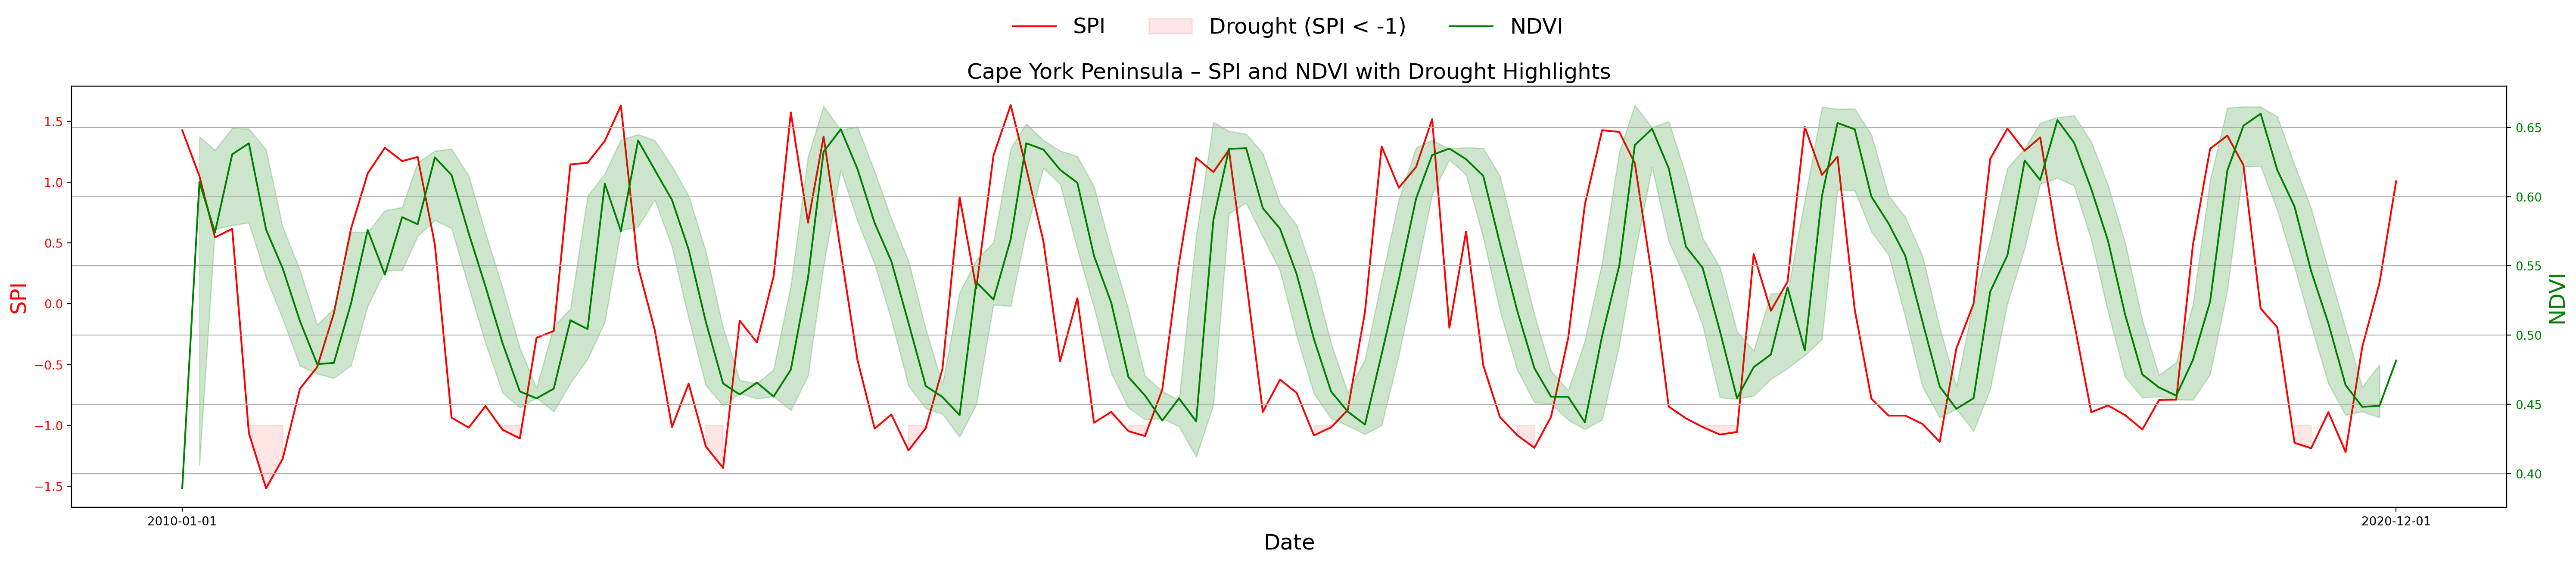

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dual_axis_highlight(df, region_name, start_date=None, end_date=None, rolling_window=3):
    # Ensure datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        df = df[mask]

    # Rolling statistics for SPI
    df['SPI_Mean'] = df['SPI'].rolling(window=rolling_window, center=True).mean()
    df['SPI_Std'] = df['SPI'].rolling(window=rolling_window, center=True).std()

    # Rolling statistics for NDVI
    df['NDVI_Mean'] = df['NDVI'].rolling(window=rolling_window, center=True).mean()
    df['NDVI_Std'] = df['NDVI'].rolling(window=rolling_window, center=True).std()

    fig, ax1 = plt.subplots(figsize=(30, 6), dpi=200)

    # SPI axis
    ax1.set_xlabel('Date', fontsize=18)
    ax1.set_ylabel('SPI', color='red', fontsize=18)
    ax1.plot(df['Date'], df['SPI'], color='red', label='SPI')

    # # SPI shaded band
    # ax1.fill_between(df['Date'],
    #                  df['SPI_Mean'] - df['SPI_Std'],
    #                  df['SPI_Mean'] + df['SPI_Std'],
    #                  color='red', alpha=0.2,
    #                  label=f'SPI ±{rolling_window}-month Std Dev')

    # Drought highlight
    drought_periods = df['SPI'] < -1
    ax1.fill_between(df['Date'], df['SPI'], -1, where=drought_periods, color='red', alpha=0.1, label='Drought (SPI < -1)')
    ax1.tick_params(axis='y', labelcolor='red')

    # NDVI axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green', fontsize=18)
    ax2.plot(df['Date'], df['NDVI'], color='green', label='NDVI')

    # NDVI shaded band
    ax2.fill_between(df['Date'],
                     df['NDVI_Mean'] - df['NDVI_Std'],
                     df['NDVI_Mean'] + df['NDVI_Std'],
                     color='green', alpha=0.2)

    ax2.tick_params(axis='y', labelcolor='green')

    # Custom x-axis ticks (start & end only)
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([df['Date'].iloc[0].strftime('%Y-%m-%d'), df['Date'].iloc[-1].strftime('%Y-%m-%d')])

    # Title & legend
    plt.title(f'{region_name} – SPI and NDVI with Drought Highlights', fontsize=18)
    fig.tight_layout()
    fig.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=False,
    fontsize=18
    )   
    plt.grid(True)
    plt.show()

plot_dual_axis_highlight(df, 'Cape York Peninsula', start_date='2010-01-01', end_date='2020-12-31', rolling_window=3)

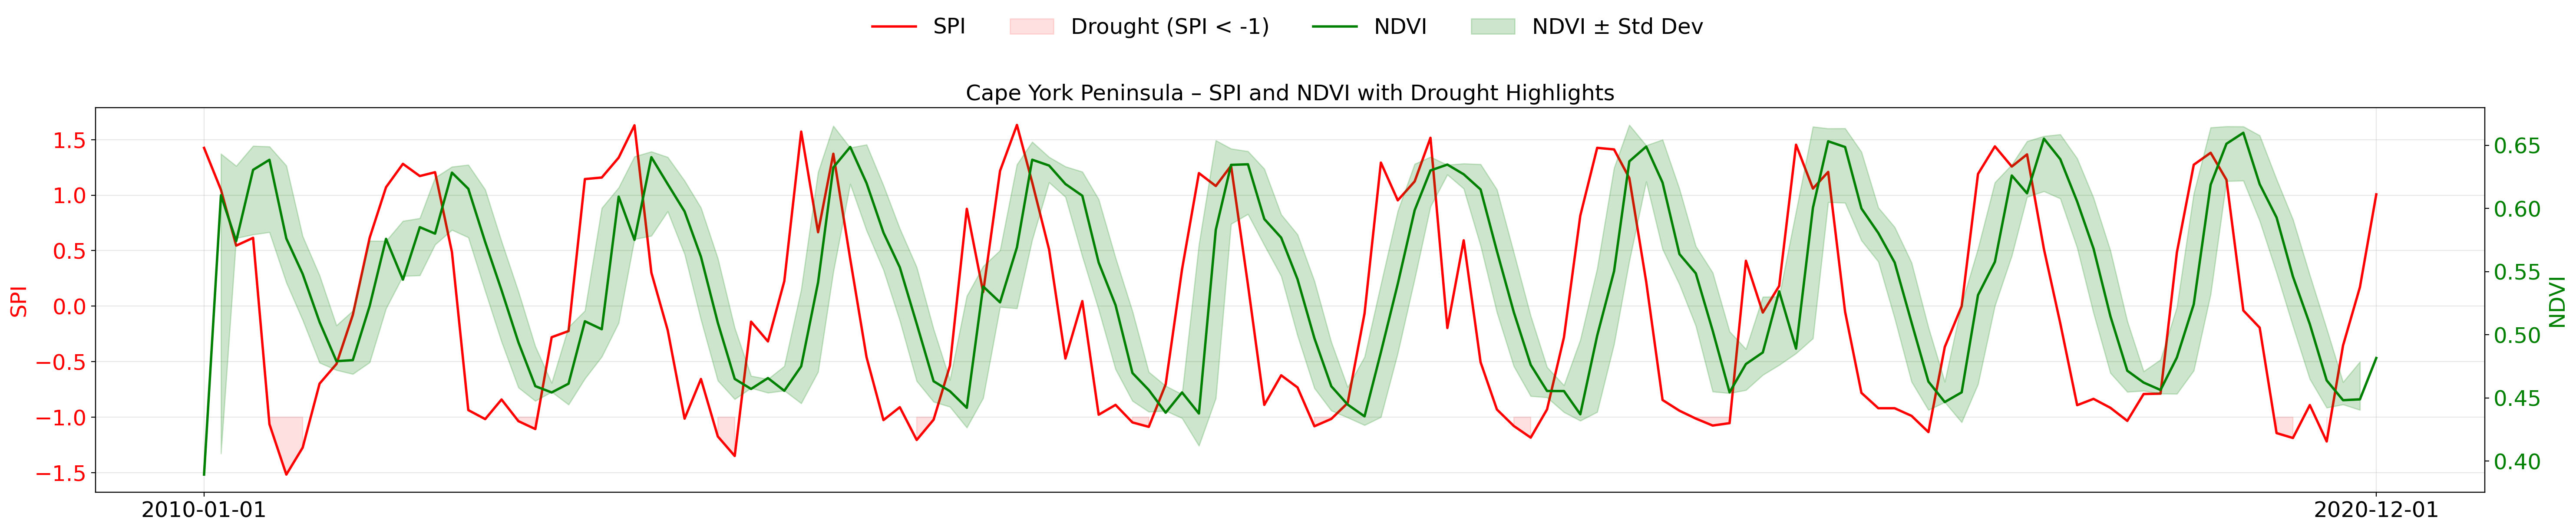

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# --------------------------------------------------
# GLOBAL FONT SETTINGS (BEST PRACTICE)
# --------------------------------------------------
plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18
})


def plot_dual_axis_highlight(
    df,
    region_name,
    start_date=None,
    end_date=None,
    rolling_window=3
):
    # Ensure datetime format
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date
    if start_date and end_date:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Rolling statistics for SPI
    df['SPI_Mean'] = df['SPI'].rolling(
        window=rolling_window, center=True
    ).mean()
    df['SPI_Std'] = df['SPI'].rolling(
        window=rolling_window, center=True
    ).std()

    # Rolling statistics for NDVI
    df['NDVI_Mean'] = df['NDVI'].rolling(
        window=rolling_window, center=True
    ).mean()
    df['NDVI_Std'] = df['NDVI'].rolling(
        window=rolling_window, center=True
    ).std()

    # Create figure
    fig, ax1 = plt.subplots(figsize=(30, 6), dpi=200)

    # --------------------------------------------------
    # SPI AXIS
    # --------------------------------------------------
    ax1.set_ylabel('SPI', color='red')

    ax1.plot(
        df['Date'], df['SPI'],
        color='red', linewidth=2, label='SPI'
    )

    # Drought highlight
    drought_periods = df['SPI'] < -1
    ax1.fill_between(
        df['Date'],
        df['SPI'],
        -1,
        where=drought_periods,
        color='red',
        alpha=0.12,
        label='Drought (SPI < -1)'
    )

    ax1.tick_params(axis='y', labelcolor='red')

    # --------------------------------------------------
    # NDVI AXIS
    # --------------------------------------------------
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='green')

    ax2.plot(
        df['Date'], df['NDVI'],
        color='green', linewidth=2, label='NDVI'
    )

    ax2.fill_between(
        df['Date'],
        df['NDVI_Mean'] - df['NDVI_Std'],
        df['NDVI_Mean'] + df['NDVI_Std'],
        color='green',
        alpha=0.20,
        label='NDVI ± Std Dev'
    )

    ax2.tick_params(axis='y', labelcolor='green')

    # --------------------------------------------------
    # X-AXIS TICKS (START & END ONLY)
    # --------------------------------------------------
    ax1.set_xticks([df['Date'].iloc[0], df['Date'].iloc[-1]])
    ax1.set_xticklabels([
        df['Date'].iloc[0].strftime('%Y-%m-%d'),
        df['Date'].iloc[-1].strftime('%Y-%m-%d')
    ])

    # --------------------------------------------------
    # TITLE
    # --------------------------------------------------
    plt.title(f'{region_name} – SPI and NDVI with Drought Highlights')

    # --------------------------------------------------
    # LEGEND (OUTSIDE, NO OVERLAP)
    # --------------------------------------------------
    fig.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.05),
        ncol=4,
        frameon=False
    )

    # --------------------------------------------------
    # FINAL LAYOUT
    # --------------------------------------------------
    fig.tight_layout(rect=[0, 0, 1, 0.93])
    ax1.grid(True, alpha=0.3)

    plt.show()


# --------------------------------------------------
# FUNCTION CALL
# --------------------------------------------------
plot_dual_axis_highlight(
    df,
    'Cape York Peninsula',
    start_date='2010-01-01',
    end_date='2020-12-31',
    rolling_window=3
)
